In [88]:
%pip install seaborn
import pandas as pd
import json
import gzip
import glob
import os
import seaborn as sb

%matplotlib inline
import matplotlib.pyplot as plt


%pip install folium

import requests
import folium
import json

import numpy as np

%pip install greynoise
from greynoise import GreyNoise
%pip install country_converter
import geopandas as gpd
import country_converter as coco

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### To access the log file, you can use the following link: https://archive.org/download/virtuepot

In [89]:

# ip_list_cloud = pd.read_csv("./Cloud/ip_list_cloud.csv")
# ip_list_vsix = pd.read_csv("./VSIX/ip_list_vsix.csv")

# ip_list_cloud =cloud_conn_df.orig_h.iloc[1:]
# ip_list_vsix =vsix_conn_df.orig_h.iloc[1:]

# from greynoise import GreyNoise

# api_key = '6KDk7Uib4gFYF1uI0Fz3vm87i5r32jeMFCfSqp6kHJOcGnMnXdNOxnChQTEvBTdr'
# integration_name = "sdk-sample"
# # ip_addresses = ['198.235.24.152', '192.168.1.1', '10.0.0.1']  # Add more IP addresses as needed

# session = GreyNoise(api_key=api_key, integration_name=integration_name)
# output = []

# for ip_address in ip_list_cloud:
#     quick_response = session.quick(ip_address)

#     for result in quick_response:
#         if result['noise']:
#             context_response = session.ip(ip_address)
#             context_response['visualizer_url'] = 'https://viz.greynoise.io/ip/' + str(ip_address)

#             # Extract and store country information
#             country_info = context_response.get('metadata', {}).get('country')
#             context_response['country'] = country_info

#             output.append(context_response)
# #         else:
# #             output.append(result)

# print(country_info)



In [90]:
vsix_gn_df = pd.read_csv("./Greynoise/VSIX/gn_analysis_2024-01-05-1707_modbus.csv")
cloud_gn_df = pd.read_csv("./Greynoise/Cloud/gn_analysis_2024-01-05-1605_modbus.csv")
frames = [vsix_gn_df, cloud_gn_df]
df = pd.concat(frames)
print (df["classification"].unique())
df

['benign' 'malicious' 'unknown' 'RIOT']


,ip,classification,first_seen,last_seen,actor,spoofable,asn,category,country,country_code,...,city,organization,rdns,tor,os,tags,ja3,scans,paths,useragents
0,205.210.31.198,benign,2023-04-14,2024-01-05,Cortex Xpanse,False,AS396982,hosting,Brazil,BR,...,São Paulo,Google LLC,NaN,False,Linux 2.2.x-3.x (Embedded),Azure OMI RCE Attempt|Cisco Smart Install Endp...,19e29534fd49dd27d09234e639c4057e:80|795bc7ce13...,0/ICMP|20/TCP|21/TCP|22/TCP|23/TCP|53/UDP|67/T...,/|/wsman,"Expanse, a Palo Alto Networks company, searche..."
1,162.243.151.12,malicious,2019-04-04,2024-01-05,Stretchoid,False,AS14061,hosting,United States,US,...,San Francisco,"DigitalOcean, LLC",apzg-0727-m-190.stretchoid.com,False,Linux 3.11+,SSH Bruteforcer|SSH Worm|ZMap Client,NaN,20/TCP|21/UDP|22/TCP|23/TCP|25/UDP|26/TCP|53/T...,NaN,NaN
2,167.248.133.122,benign,2023-10-27,2024-01-05,Censys,False,AS398324,business,United States,US,...,Chicago,"Censys, Inc.",scanner-26.ch1.censys-scanner.com,False,Linux 2.2-3.x,Codesys Scanner|Erlang Port Mapper Daemon Craw...,1289771a3fce256d5fb4cb5c95b43ee6:1|1f24dbdea9c...,1/TCP|2/TCP|3/TCP|4/TCP|5/TCP|6/TCP|7/TCP|8/TC...,/api/v1/label/goversion/values|/api/v1/targets...,Mozilla/5.0 (compatible; CensysInspect/1.1; +h...
3,162.142.125.224,benign,2023-03-07,2024-01-05,Censys,False,AS398324,business,United States,US,...,Chicago,"Censys, Inc.",scanner-25.ch1.censys-scanner.com,False,Linux 2.2-3.x,Codesys Scanner|Erlang Port Mapper Daemon Craw...,1f24dbdea9cbd448a034e5d87c14168f:1|35fa0a83e46...,1/TCP|2/TCP|3/TCP|4/TCP|5/TCP|6/TCP|7/TCP|8/TC...,/version|/|/api/v1/label/goversion/values|/api...,Mozilla/5.0 (compatible; CensysInspect/1.1; +h...
4,167.94.146.52,benign,2023-08-23,2024-01-05,Censys,False,AS398705,business,Germany,DE,...,Frankfurt am Main,"Censys, Inc.",NaN,False,Linux 2.2-3.x,Codesys Scanner|Erlang Port Mapper Daemon Craw...,35fa0a83e466acbec1cfbb9016d550ab:1|35fa0a83e46...,1/TCP|2/TCP|3/TCP|4/TCP|5/TCP|6/TCP|7/TCP|8/TC...,/api/v1/label/goversion/values|/api/v1/label/v...,Mozilla/5.0 (compatible; CensysInspect/1.1; +h...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,167.94.146.55,benign,2023-07-28,2024-01-05,Censys,False,AS398705,business,Germany,DE,...,Frankfurt am Main,"Censys, Inc.",NaN,False,Linux 2.2-3.x,Censys|Codesys Scanner|Erlang Port Mapper Daem...,35fa0a83e466acbec1cfbb9016d550ab:1|35fa0a83e46...,1/TCP|2/TCP|3/TCP|4/TCP|5/TCP|6/TCP|7/TCP|8/TC...,/api/v1/query|/api/v1/label/version/values|/ap...,Mozilla/5.0 (compatible; CensysInspect/1.1; +h...
76,172.105.128.11,benign,2022-08-25,2024-01-05,bufferover.run,False,AS63949,hosting,United States,US,...,Morris Plains,Akamai Connected Cloud,oslo.scan.bufferover.run,False,unknown,SSH Bruteforcer|SSH Worm|Telnet Bruteforcer|TL...,c3a6cf0bf2e690ac8e1ecf6081f17a50:1|cba7f34191e...,1/TCP|7/TCP|9/TCP|13/TCP|21/TCP|22/TCP|23/TCP|...,/,Mozilla/5.0 (Macintosh; Intel Mac OS X 13_1) A...
77,65.49.1.108,malicious,2023-07-07,2024-01-05,unknown,False,AS6939,hosting,United States,US,...,Pleasanton,Hurricane Electric LLC,scan-59a.shadowserver.org,False,Linux 2.2.x-3.x (Embedded),ADB Check|Cisco Implant Trigger Packet|Cisco S...,cba7f34191ef2379c1325641f6c6c4f4:80|22aa2bdb63...,7/UDP|17/UDP|19/UDP|21/TCP|22/TCP|23/TCP|25/TC...,/api/v2/static/not.found|/|/geoserver/web/|/fa...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; ...
78,198.74.56.46,malicious,2022-12-05,2024-01-05,unknown,False,AS63949,hosting,United States,US,...,Morris Plains,Akamai Connected Cloud,198-74-56-46.ip.linodeusercontent.com,False,Linux 2.2.x-3.x (Embedded),MQTT Protocol Scanner|RDP Alternative Port Cra...,cba7f34191ef2379c1325641f6c6c4f4:23|cba7f34191...,1/TCP|7/TCP|9/TCP|13/TCP|21/TCP|22/TCP|23/TCP|...,/,Mozilla/5.0 zgrab/0.x|


In [91]:
vsix_df_un = vsix_gn_df.drop_duplicates(subset='ip', keep='first')
print ("VSIX Malicious IPs percentage: " +str(100*len(vsix_df_un[vsix_df_un["classification"] == "malicious"])/len(vsix_df_un)))
print ("VSIX Benign IPs percentage: " +str(100*len(vsix_df_un[vsix_df_un["classification"] == "benign"])/len(vsix_df_un)))



cloud_df_un = cloud_gn_df.drop_duplicates(subset='ip', keep='first')
print ("Cloud Malicious IPs percentage: " +str(100*len(cloud_df_un[cloud_df_un["classification"] == "malicious"])/len(cloud_df_un)))
print ("Cloud Benign IPs percentage: " +str(100*len(cloud_df_un[cloud_df_un["classification"] == "benign"])/len(cloud_df_un)))




VSIX Malicious IPs percentage: 38.05309734513274
VSIX Benign IPs percentage: 57.52212389380531
Cloud Malicious IPs percentage: 40.0
Cloud Benign IPs percentage: 58.75


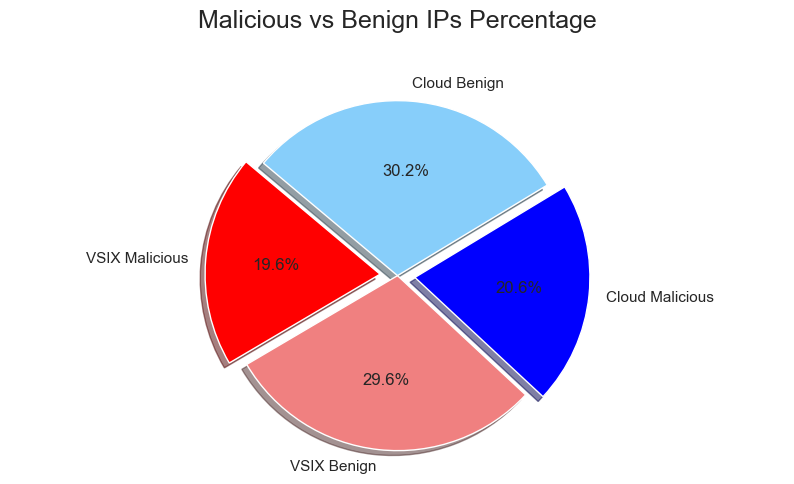

In [92]:
# VSIX Data
vsix_df_un = vsix_gn_df.drop_duplicates(subset='ip', keep='first')
vsix_malicious_percentage = 100 * len(vsix_df_un[vsix_df_un["classification"] == "malicious"]) / len(vsix_df_un)
vsix_benign_percentage = 100 * len(vsix_df_un[vsix_df_un["classification"] == "benign"]) / len(vsix_df_un)

# Cloud Data
cloud_df_un = cloud_gn_df.drop_duplicates(subset='ip', keep='first')
cloud_malicious_percentage = 100 * len(cloud_df_un[cloud_df_un["classification"] == "malicious"]) / len(cloud_df_un)
cloud_benign_percentage = 100 * len(cloud_df_un[cloud_df_un["classification"] == "benign"]) / len(cloud_df_un)

# Plotting Pie Chart
labels = ['VSIX Malicious', 'VSIX Benign', 'Cloud Malicious', 'Cloud Benign']
sizes = [vsix_malicious_percentage, vsix_benign_percentage, cloud_malicious_percentage, cloud_benign_percentage]
colors = ['red', 'lightcoral', 'blue', 'lightskyblue']
explode = (0.1, 0, 0.1, 0)  # explode the 1st and 3rd slices

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Malicious vs Benign IPs Percentage', size=18,pad=40)
plt.savefig('MaliciousvsBenign.pdf',bbox_inches='tight')
plt.show()



In [93]:
cloud_df_un[cloud_df_un["classification"] == "malicious"]

,ip,classification,first_seen,last_seen,actor,spoofable,asn,category,country,country_code,...,city,organization,rdns,tor,os,tags,ja3,scans,paths,useragents
0,34.207.207.80,malicious,2022-05-19,2023-12-28,unknown,False,AS14618,hosting,United States,US,...,Ashburn,"Amazon.com, Inc.",ec2-34-207-207-80.compute-1.amazonaws.com,False,Linux 2.2-3.x,Azure OMI RCE Check|Python Requests Client|Red...,0e9a732e8288b157063a5f95e3994eb8:443|5ad23b5eb...,22/TCP|25/TCP|53/TCP|81/TCP|111/TCP|139/TCP|38...,/|/wsman,elasticsearch-py/7.13.4 (Python 3.10.2)|Mozill...
1,60.190.248.12,malicious,2019-11-23,2024-01-04,unknown,False,AS4134,isp,China,CN,...,Hangzhou,CHINANET-BACKBONE,NaN,False,Windows 7/8,EHLO Crawler|EtherNet/IP Scanner|Modbus TCP Sc...,a5d745df6c6c52b3f6c348a6e8e2f540:443|c191658a2...,0/ICMP|21/TCP|22/TCP|23/TCP|25/TCP|37/TCP|49/T...,/,NaN
2,192.241.231.51,malicious,2020-03-01,2024-01-05,Stretchoid,False,AS14061,hosting,United States,US,...,San Francisco,"DigitalOcean, LLC",apzg-0720d-046.stretchoid.com,False,Linux 3.11+,Apache Tomcat Crawler|Chromecast Scanner|EHLO ...,caaddd3ed0a315543d761490b01b08e0:25|917fde1bf3...,20/TCP|21/TCP|22/TCP|23/TCP|25/TCP|26/TCP|53/T...,/setup/eureka_info|/ui|/version|/info|/_search...,Mozilla/5.0 zgrab/0.x|
5,192.241.232.40,malicious,2023-06-20,2024-01-05,Stretchoid,False,AS14061,hosting,United States,US,...,San Francisco,"DigitalOcean, LLC",apzg-0720c-079.stretchoid.com,False,Linux 3.11+,Apache Tomcat Crawler|Chromecast Scanner|Couch...,caaddd3ed0a315543d761490b01b08e0:389|03a3ad270...,20/TCP|21/TCP|22/TCP|25/TCP|26/TCP|53/TCP|70/T...,/_all_dbs|/druid/index.html|/hudson|/|/setup/e...,Mozilla/5.0 zgrab/0.x
7,172.104.210.105,malicious,2022-12-05,2024-01-05,unknown,False,AS63949,hosting,United States,US,...,Morris Plains,Akamai Connected Cloud,172-104-210-105.ip.linodeusercontent.com,False,Linux 2.2.x-3.x (Embedded),MQTT Protocol Scanner|RDP Alternative Port Cra...,cba7f34191ef2379c1325641f6c6c4f4:1|cba7f34191e...,1/TCP|7/TCP|9/TCP|13/TCP|21/TCP|22/TCP|23/TCP|...,/,Mozilla/5.0 zgrab/0.x|
11,159.203.208.13,malicious,2022-12-21,2024-01-05,Stretchoid,False,AS14061,hosting,United States,US,...,San Francisco,"DigitalOcean, LLC",apzg-0727-m-008.stretchoid.com,False,Linux 3.11+,SSH Bruteforcer|ZMap Client,NaN,20/TCP|21/TCP|22/TCP|23/TCP|25/UDP|26/TCP|53/U...,NaN,NaN
20,194.187.176.203,malicious,2022-12-12,2024-01-05,unknown,False,AS208843,business,Germany,DE,...,Berlin,Alpha Strike Labs GmbH,NaN,False,Linux 2.2.x-3.x (Embedded),Azure OMI RCE Attempt|EtherNet/IP Scanner|favi...,1aee78ef7ba4d7165f1395b15d4d2103:443|af942df3f...,21/TCP|22/TCP|23/TCP|25/TCP|53/TCP|69/UDP|80/T...,/wsman|/favicon.ico|/ipp|/,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...
21,107.170.227.12,malicious,2022-12-21,2024-01-05,Stretchoid,False,AS14061,hosting,United States,US,...,San Francisco,"DigitalOcean, LLC",apzg-0721-a-097.stretchoid.com,False,Linux 3.11+,Apache Tomcat Crawler|Chromecast Scanner|Couch...,4efa2927cd9c5711813345d734439c0c:443|7f9ae904e...,21/TCP|22/TCP|23/TCP|26/TCP|53/TCP|80/TCP|81/T...,/stats|/portal/redlion|/manager/html|/druid/in...,Mozilla/5.0 zgrab/0.x
22,198.199.117.130,malicious,2023-07-21,2024-01-05,Stretchoid,False,AS14061,hosting,United States,US,...,San Francisco,"DigitalOcean, LLC",apzg-0721n-020.stretchoid.com,False,Linux 3.11+,SSH Bruteforcer|ZMap Client,NaN,20/TCP|21/TCP|22/UDP|23/UDP|25/TCP|26/TCP|53/U...,NaN,NaN
24,198.199.111.115,malicious,2023-07-14,2024-01-05,Stretchoid,False,AS14061,hosting,United States,US,...,San Francisco,"DigitalOcean, LLC",apzg-0721m-054.stretchoid.com,False,Linux 3.11+,SSH Bruteforcer|Stretchoid|ZMap Client,NaN,20/TCP|21/TCP|22/TCP|23/UDP|25/TCP|26/TCP|53/T...,NaN,NaN


In [94]:
# cloud_conn_log_path = './Cloud/zeek_pcap/data/conn.log'  
# vsix_conn_log_path = './VSIX/zeek_pcap/conn.log'  

# cloud_conn_df = pd.read_json(cloud_conn_log_path)
# vsix_conn_df = pd.read_json(vsix_conn_log_path)

#vsix_conn_df.to_csv('vsix_conn_df.csv')
#cloud_conn_df.to_csv('cloud_conn_df.csv')

cloud_conn_df = pd.read_csv("./Cloud/cloud_conn_df.csv")
vsix_conn_df = pd.read_csv("./VSIX/vsix_conn_df.csv")

/var/folders/jb/hcx17ph52494vkhfp76frhg40000gn/T/ipykernel_27602/3302081782.py:10: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  cloud_conn_df = pd.read_csv("./Cloud/cloud_conn_df.csv")
/var/folders/jb/hcx17ph52494vkhfp76frhg40000gn/T/ipykernel_27602/3302081782.py:11: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  vsix_conn_df = pd.read_csv("./VSIX/vsix_conn_df.csv")


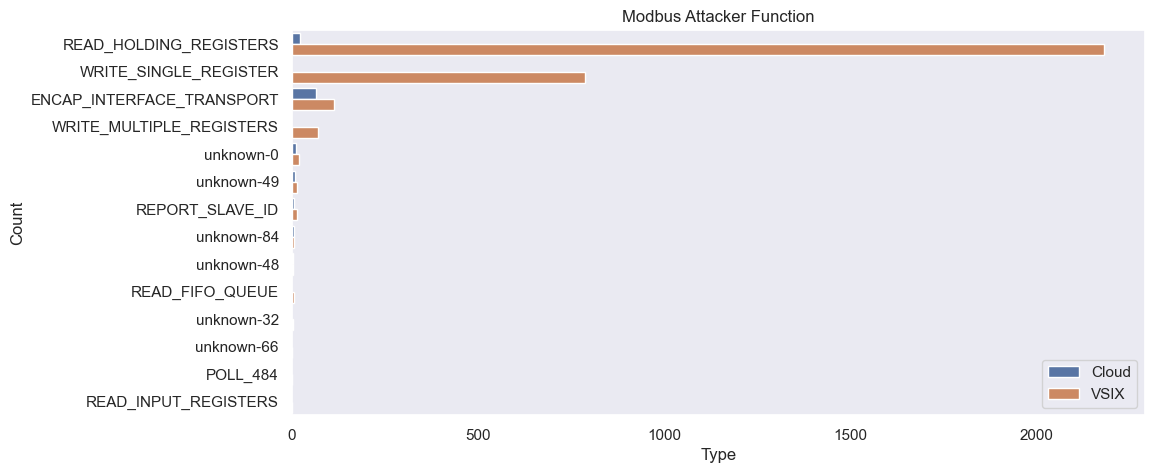

In [95]:
                      
#modbus
cloud_modbus_log_path = './Cloud/zeek_pcap/data/modbus_detailed.log'
vsix_modbus_log_path = './VSIX/zeek_pcap/modbus_detailed.log'

cloud_modbus_df = pd.read_json(cloud_modbus_log_path)
vsix_modbus_df = pd.read_json(vsix_modbus_log_path)

cloud_modbus_df['source'] = 'Cloud'
vsix_modbus_df['source'] = 'VSIX'
combined_df = pd.concat([cloud_modbus_df, vsix_modbus_df]) 

plt.figure(figsize=(11,5))

sb.countplot(data=combined_df, y='func', hue='source',
             order=combined_df['func'].value_counts().iloc[:20].index, orient='h')
plt.legend(loc='lower right')
sb.set_style("darkgrid")
plt.title('Modbus Attacker Function')
plt.ylabel('Count')
plt.xlabel('Type');
plt.savefig('Modbus.pdf',bbox_inches='tight')

In [96]:

cloud_modbus_df =cloud_modbus_df.rename(columns={'id.orig_h': 'orig_h',})
vsix_modbus_df =vsix_modbus_df.rename(columns={'id.orig_h': 'orig_h',})

ip_list_cloud =cloud_modbus_df.orig_h
ip_list_vsix =vsix_modbus_df.orig_h


In [97]:
# def get_country(ip):
#     request_url = 'https://geolocation-db.com/jsonp/' + ip
#     response = requests.get(request_url)
#     result = response.content.decode()
#     result = result.split("(")[1].strip(")")
#     result = json.loads(result)
#     return result.get('country_code'), result.get('country_name')

# cloud_conn_df =cloud_conn_df.rename(columns={'id.orig_h': 'orig_h',})
# vsix_conn_df =vsix_conn_df.rename(columns={'id.orig_h': 'orig_h',})

# ip_list_cloud =cloud_conn_df.orig_h.iloc[1:]
# ip_list_vsix =vsix_conn_df.orig_h.iloc[1:]


# ip_list_cloud
# ip_list_vsix

# ip_list_cloud.to_csv('ip_list_cloud.csv')
# ip_list_vsix.to_csv('ip_list_vsix.csv')

# c_code_cloud[['country_code', 'country_name']] = ip_list_cloud.apply(lambda x: pd.Series(get_country(x)))
# c_code_vsix[['country_code', 'country_name']] = ip_list_vsix.apply(lambda x: pd.Series(get_country(x)))


# c_code_cloud = c_code_cloud.replace('Not found', np.nan, regex=True)
# c_code_vsix = c_code_vsix.replace('Not found', np.nan, regex=True)

# ip_list_cloud = pd.read_csv("./Cloud/ip_list_cloud.csv")
# ip_list_vsix = pd.read_csv("./VSIX/ip_list_vsix.csv")


In [98]:


# from greynoise import GreyNoise

# # Assuming you have a DataFrame named df with a column named 'ip_address'
# # Make sure to replace 'ip_address' with the actual column name in your DataFrame

# # df = pd.read_csv('./Cloud/ip_list_cloud.csv')  # Replace 'your_dataframe.csv' with the actual file path

# api_key = '6KDk7Uib4gFYF1uI0Fz3vm87i5r32jeMFCfSqp6kHJOcGnMnXdNOxnChQTEvBTdr'
# integration_name = "sdk-sample"

# session = GreyNoise(api_key=api_key, integration_name=integration_name)
# output = []

# # Assuming your DataFrame has a column named 'ip_address'
# ip_addresses = ip_list_cloud['orig_h']

# for ip_address in ip_addresses:
#     quick_response = session.quick(ip_address)

#     for result in quick_response:
#         if result['noise']:
#             context_response = session.ip(ip_address)
#             context_response['visualizer_url'] = 'https://viz.greynoise.io/ip/' + str(ip_address)
#             output.append(context_response)
#         else:
#             output.append(result)

# print(output)


In [99]:
# # Setting the path to the shapefile
# SHAPEFILE = 'worldmap/ne_50m_admin_0_countries.shp'

# # Read shapefile using Geopandas
# geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]

# # Rename columns.
# geo_df.columns = ['country', 'country_code', 'geometry']
# geo_df.head(3)

In [100]:
# # Next, we need to ensure that our data matches with the country codes.
# iso3_codes = geo_df['country'].to_list()
# # Convert to iso3_codes
# iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')
# # Add the list with iso2 codes to the dataframe
# geo_df['iso2_code'] = iso2_codes_list
# # There are some countries for which the converter could not find a country code.
# # We will drop these countries.
# geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)
# geo_df.head(3)

In [101]:
# df1 = df.groupby(["country"]).size().reset_index(name='frequency')
# # Merge the two dataframes
# merged_df = pd.merge(left=geo_df, right=df1, how='left', left_on='country', right_on='country')
# #Create the indicator values
# merged_df['frequency'].fillna(0, inplace=True)
# merged_df.head(3)

In [102]:
# # Show the data
# # Plot the map
# title = "IP's origin"
# col = 'frequency'
# vmin = merged_df[col].min()
# vmax = merged_df[col].max()
# cmap = 'tab20c'

# fig, ax = plt.subplots(1, figsize=(10, 6))
# ax.axis('off')
# merged_df.plot(column=col, ax=ax, linewidth=1, cmap=cmap, edgecolor='white')
# ax.set_title(title, fontdict={'fontsize': '18', 'fontweight' : '3'})

# # Create colorbar as a legend
# sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
# # Empty array for the data range
# sm._A = []
# # Add the colorbar to the figure
# cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
# cbar = fig.colorbar(sm, cax=cbaxes)
# fig.savefig('world.pdf', bbox_inches = 'tight', pad_inches = 0)

           country  frequency
12   United States        128
5          Germany         20
2           Brazil         11
3            China          7
8      Netherlands          6
10          Taiwan          6
1          Belgium          5
9           Russia          2
11  United Kingdom          2
0          Austria          1
4         Colombia          1
6        Hong Kong          1
7            India          1


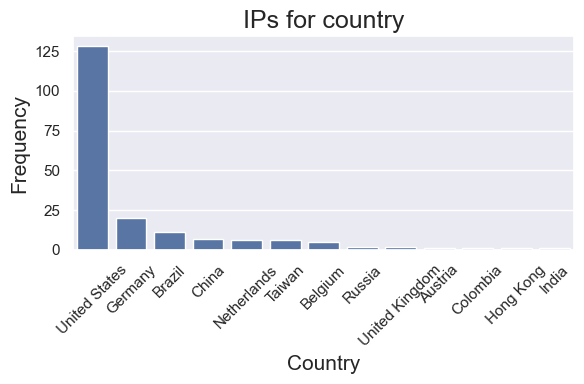

In [103]:
# country counter
sb.set(rc={'figure.figsize':(6,4)})
df1 = df.groupby(["country"]).size().reset_index(name='frequency')
print (df1.sort_values('frequency',ascending = False))
g = sb.barplot(x='country',  y="frequency", data=df1, order=df1.sort_values('frequency',ascending = False).country, color='b')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
# set labels
plt.xlabel("Country", size=15)
plt.ylabel("Frequency", size=15)
plt.title("IPs for country", size=18)
plt.tight_layout()
plt.savefig('countries.pdf')

                                    organization  frequency
7                              DigitalOcean, LLC         48
0                         Akamai Connected Cloud          7
8                         Hurricane Electric LLC          5
1                         Alpha Strike Labs GmbH          2
4                              CHINANET-BACKBONE          2
5                                CT-HangZhou-IDC          2
10    Ningxia West Cloud Data Technology Co.Ltd.          2
2                               Amazon.com, Inc.          1
3                 CHINA UNICOM China169 Backbone          1
6                   Cat Technologies Co. Limited          1
9                            Level 3 Parent, LLC          1
11  SB Secure Data centers India Private Limited          1
12                                Scloud Pte Ltd          1
13                   XHOST INTERNET SOLUTIONS LP          1


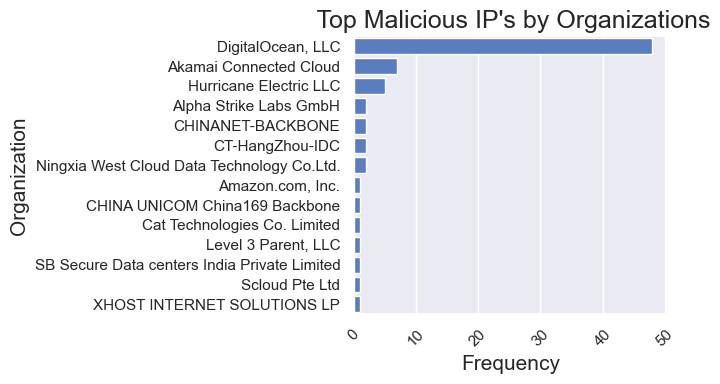

In [104]:
# country counter
sb.set(rc={'figure.figsize':(7,4)})
df2 = df[df["classification"] == 'malicious']
df2 = df2.groupby(["organization"]).size().reset_index(name='frequency')
sb.set_color_codes("muted")
g = sb.barplot(y='organization',  x="frequency", data=df2, order=df2.sort_values('frequency',ascending = False).organization, color='b')
print (df2.sort_values('frequency',ascending = False))
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

# set labels
plt.xlabel("Frequency", size=15)
plt.ylabel("Organization", size=15)
plt.title(" Top Malicious IP's by Organizations", size=18)
plt.tight_layout()
plt.savefig('organizations.pdf')

/var/folders/jb/hcx17ph52494vkhfp76frhg40000gn/T/ipykernel_27602/3481089470.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=25, horizontalalignment='right')


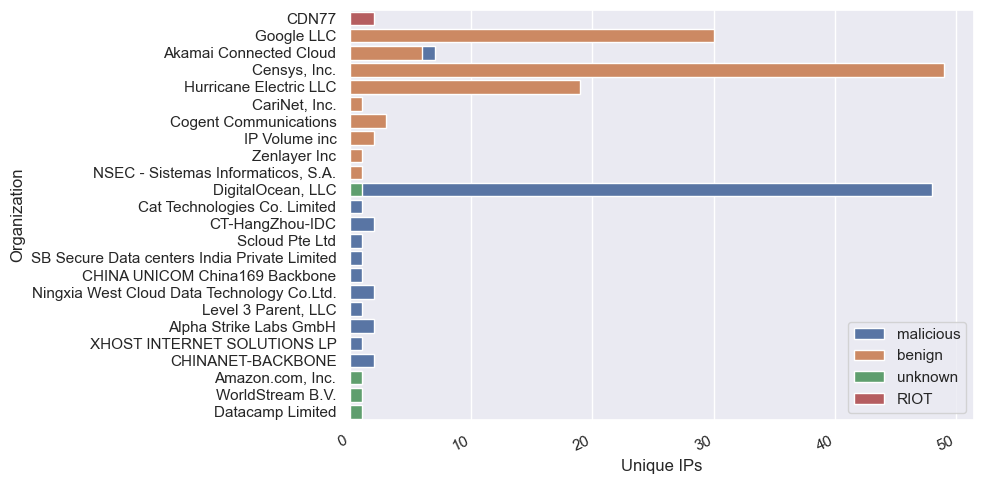

In [105]:
sb.set(rc={'figure.figsize':(10,5)})

df3 = df.groupby(["organization"])["classification"].value_counts().reset_index()
# selected_orga = ["DigitalOcean", "Amazon", "CHINA UNICOM", "Aggros Operations", "HK Zhengxing Technology" ]
g = sb.barplot(
    data=df3,
    y="organization", x="count", hue="classification", dodge=False,order=df.sort_values('classification',ascending = True).organization
)

g.set_xticklabels(g.get_xticklabels(), rotation=25, horizontalalignment='right')

# set labels
plt.xlabel("Unique IPs")
plt.ylabel("Organization")
plt.legend(loc='lower right')
#plt.title("", size=18)
plt.tight_layout()
plt.savefig('organization_stacked.pdf')


In [106]:
vsix_conn_df.head()

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,...,orig_region,resp_region,orig_lat,orig_long,resp_lat,resp_long,service,duration,orig_bytes,resp_bytes
0,0,1.697716e+09,Cfd5OrW1o6bUIGiY6,185.213.114.3,37564,18.215.138.58,443,tcp,OTH,0,...,34.0,VA,45.408,11.8859,39.0481,-77.4728,NaN,NaN,NaN,NaN
1,1,1.697716e+09,CiNPU42OPEBBOKR4x2,185.213.114.3,37570,18.215.138.58,443,tcp,OTH,0,...,34.0,VA,45.408,11.8859,39.0481,-77.4728,NaN,NaN,NaN,NaN
2,2,1.697716e+09,CdHAZE2BKjGzIIccE1,185.213.114.3,32984,104.16.103.207,443,tcp,OTH,0,...,34.0,NaN,45.408,11.8859,37.7510,-97.8220,NaN,NaN,NaN,NaN
3,3,1.697716e+09,Cnnxgo4vCTr4ULx7Ja,185.213.114.3,37984,91.189.91.81,80,tcp,OTH,0,...,34.0,MA,45.408,11.8859,42.3562,-71.0631,NaN,NaN,NaN,NaN
4,4,1.697716e+09,C5FNauwJ4QlQb9Una,185.213.114.3,56092,91.189.91.82,80,tcp,OTH,0,...,34.0,MA,45.408,11.8859,42.3562,-71.0631,NaN,NaN,NaN,NaN


In [107]:
cloud_conn_df.head()

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,...,orig_lat,orig_long,resp_lat,resp_long,orig_city,orig_region,service,resp_city,resp_region,tunnel_parents
0,0,1.703012e+09,CPiwVIn28fIGzW2Q1,176.9.140.49,48018,161.35.192.166,26656,tcp,0.000086,0.0,...,51.2993,9.4910,37.7510,-97.8220,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.703012e+09,ChyENIoaYkomMleUf,176.111.174.30,49441,161.35.192.166,2022,tcp,0.064473,0.0,...,51.4964,-0.1224,37.7510,-97.8220,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.703012e+09,CWthEEZIcZyMbD9H4,161.35.192.166,33558,185.125.188.54,443,tcp,0.014510,0.0,...,37.7510,-97.8220,51.4964,-0.1224,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.703012e+09,CNJ7ac2U2ff2JHZNcf,141.95.66.131,56110,161.35.192.166,26656,tcp,0.000094,0.0,...,51.2993,9.4910,37.7510,-97.8220,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.703012e+09,CCyn3K2NGNgN6VIQz2,92.63.197.224,53252,161.35.192.166,10124,tcp,0.032088,0.0,...,55.7386,37.6068,37.7510,-97.8220,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# cloud_modbus_df =cloud_modbus_df.rename(columns={'id.orig_h': 'orig_ip',})
# vsix_modbus_df =vsix_modbus_df.rename(columns={'id.orig_h': 'orig_ip',})

# ip_list_cloud =cloud_modbus_df.orig_ip
# ip_list_vsix =vsix_modbus_df.orig_ip

# # Function to get latitude and longitude from IP address
# def get_lat_lon(ip):
#     request_url = 'https://geolocation-db.com/jsonp/' + ip
#     response = requests.get(request_url)
#     result = response.content.decode()
#     result = result.split("(")[1].strip(")")
#     result = json.loads(result)
#     return result.get('latitude'), result.get('longitude')

# df1 = pd.DataFrame()
# df2 = pd.DataFrame()

# # Apply the function to the DataFrame
# # df1[['Latitude', 'Longitude']] = df.orig_ip.apply(lambda x: pd.Series(get_lat_lon(x)))
# df1[['Latitude', 'Longitude']] = ip_list_cloud.apply(lambda x: pd.Series(get_lat_lon(x)))
# df2[['Latitude', 'Longitude']] = ip_list_vsix.apply(lambda x: pd.Series(get_lat_lon(x)))

# df1 = df1.replace('Not found', np.nan, regex=True)
# df2 = df2.replace('Not found', np.nan, regex=True)


# # Drop rows with missing values (if any)
# df1 = df1.dropna()
# df1.astype(float)
# df2 = df2.dropna()
# df2.astype(float)



# # Create a folium map centered around the mean of the coordinates
# map_center = [df1['Latitude'].mean(), df1['Longitude'].mean()]
# my_map = folium.Map(location=map_center, zoom_start=2)

# # Add markers to the map based on the DataFrame

# cloud_group = folium.FeatureGroup("Cloud Group").add_to(my_map)
# for index, row in df1.iterrows():
#     folium.Marker([row['Latitude'], row['Longitude']],icon=folium.Icon(icon="cloud"),).add_to(cloud_group)

    
# vsix_group = folium.FeatureGroup("VSIX Group").add_to(my_map)
# for index, row in df2.iterrows():
#     folium.Marker([row['Latitude'], row['Longitude']],icon=folium.Icon(color="red"),).add_to(vsix_group)
    
# folium.LayerControl().add_to(my_map)
# # Save the map to an HTML file or display it in a Jupyter Notebook
# my_map


Indian Ocean Territories not found in regex
Ashmore and Cartier Islands not found in regex
Siachen Glacier not found in regex


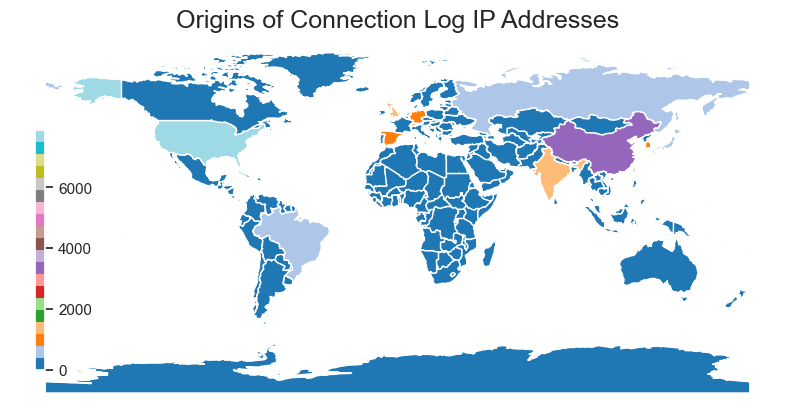

In [109]:
# %pip install plotly
# import plotly.express as px

# # Data with latitude/longitude and values
# df = pd.read_csv('https://raw.githubusercontent.com/R-CoderDotCom/data/main/sample_datasets/population_spain.csv', encoding = 'latin-1')

# fig = px.scatter_mapbox(df, lat = 'latitude', lon = 'longitude', size = 'tot_pop',
#                         color = 'tot_pop', color_continuous_scale = 'plasma',
#                         zoom = 3, mapbox_style = 'carto-positron')
# # fig.write_image("static/en/plotly/bubble-map-plotly.png", width = 500, height = 500)                        
# fig.show() 




ip_list_cloud = pd.read_csv("./Cloud/results_iplist_cloud.csv")
ip_list_vsix = pd.read_csv("./VSIX/results_iplist_vsix.csv")

frames = [ip_list_cloud, ip_list_vsix ]

result = pd.concat(frames)

# Setting the path to the shapefile
SHAPEFILE = 'worldmap/ne_50m_admin_0_countries.shp'

# Read shapefile using Geopandas
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]

# Rename columns.
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df.head(3)


# Next, we need to ensure that our data matches with the country codes.
iso3_codes = geo_df['country'].to_list()
# Convert to iso3_codes
iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')
# Add the list with iso2 codes to the dataframe
geo_df['iso2_code'] = iso2_codes_list
# There are some countries for which the converter could not find a country code.
# We will drop these countries.
geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)
geo_df.head(3)


df1 = result.groupby(["country"]).size().reset_index(name='frequency')
# Merge the two dataframes
merged_df = pd.merge(left=geo_df, right=df1, how='left', left_on='iso2_code', right_on='country')
#Create the indicator values
merged_df['frequency'].fillna(0, inplace=True)
merged_df.head(3)



# Show the data
# Plot the map
title = "Origins of Connection Log IP Addresses"
col = 'frequency'
vmin = merged_df[col].min()
vmax = merged_df[col].max()
cmap = 'tab20'

fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
merged_df.plot(column=col, ax=ax, linewidth=1, cmap=cmap, edgecolor='white')
ax.set_title(title, fontdict={'fontsize': '18', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)
fig.savefig('world_cloud&vsix.pdf', bbox_inches = 'tight', pad_inches = 0)


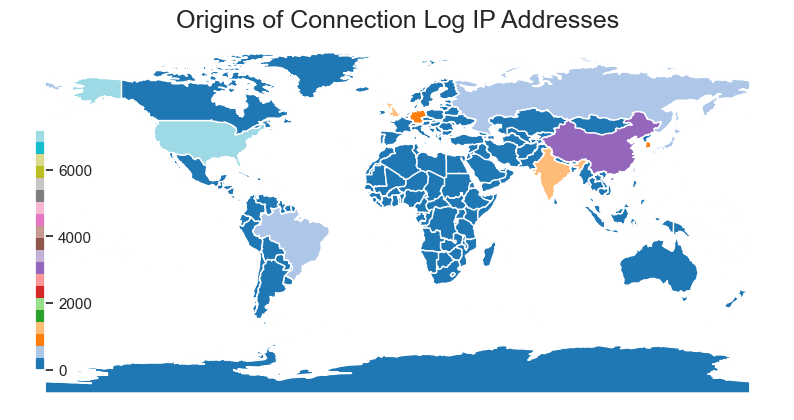

In [110]:

df1 = ip_list_cloud.groupby(["country"]).size().reset_index(name='frequency')
# Merge the two dataframes
merged_df = pd.merge(left=geo_df, right=df1, how='left', left_on='iso2_code', right_on='country')
#Create the indicator values
merged_df['frequency'].fillna(0, inplace=True)
merged_df.head(3)



# Show the data
# Plot the map
title = "Origins of Connection Log IP Addresses"
col = 'frequency'
vmin = merged_df[col].min()
vmax = merged_df[col].max()
cmap = 'tab20'

fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
merged_df.plot(column=col, ax=ax, linewidth=1, cmap=cmap, edgecolor='white')
ax.set_title(title, fontdict={'fontsize': '18', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)
fig.savefig('world_cloud.pdf', bbox_inches = 'tight', pad_inches = 0)

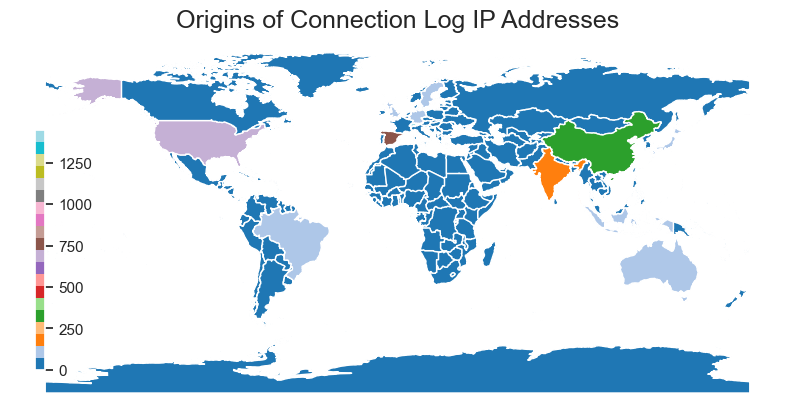

In [111]:

df1 = ip_list_vsix.groupby(["country"]).size().reset_index(name='frequency')
# Merge the two dataframes
merged_df = pd.merge(left=geo_df, right=df1, how='left', left_on='iso2_code', right_on='country')
#Create the indicator values
merged_df['frequency'].fillna(0, inplace=True)
merged_df.head(3)



# Show the data
# Plot the map
title = "Origins of Connection Log IP Addresses"
col = 'frequency'
vmin = merged_df[col].min()
vmax = merged_df[col].max()
cmap = 'tab20'

fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
merged_df.plot(column=col, ax=ax, linewidth=1, cmap=cmap, edgecolor='white')
ax.set_title(title, fontdict={'fontsize': '18', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)
fig.savefig('world_vsix.pdf', bbox_inches = 'tight', pad_inches = 0)

In [112]:
# # Read the conn.log file into a Pandas DataFrame
# # Replace with the actual path to your conn.log file
# cloud_conn_log_path = './Cloud/zeek_pcap/data/conn.log'  
# vsix_conn_log_path = './VSIX/zeek_pcap/conn.log'  

# cloud_conn_df = pd.read_json(cloud_conn_log_path)
# vsix_conn_df = pd.read_json(vsix_conn_log_path)

# #http logs 
# cloud_http_log_path = './Cloud/zeek_pcap/data/http.log'
# vsix_http_log_path = './VSIX/zeek_pcap/http.log'

# cloud_http_df = pd.read_json(cloud_http_log_path)
# vsix_http_df = pd.read_json(vsix_http_log_path)

# #modbus
# cloud_modbus_log_path = './Cloud/zeek_pcap/data/modbus_detailed.log'
# vsix_modbus_log_path = './VSIX/zeek_pcap/modbus_detailed.log'

# cloud_modbus_df = pd.read_json(cloud_modbus_log_path)
# vsix_modbus_df = pd.read_json(vsix_modbus_log_path)


# #s7
# cloud_s7read_log_path = './Cloud/zeek_pcap/data/s7comm_read_szl.log' 
# cloud_s7comm_log_path = './VSIX/zeek_pcap/s7comm.log'

# cloud_s7read_df = pd.read_json(cloud_s7read_log_path)
# vsix_s7read_df = pd.read_json(cloud_s7comm_log_path)





In [113]:
import pandas as pd
cloud_http_log_path = './Cloud/zeek_pcap/data/http.log'
vsix_http_log_path = './VSIX/zeek_pcap/http.log'
cloud_http_df = pd.read_json(cloud_http_log_path)
vsix_http_df = pd.read_json(vsix_http_log_path)

In [114]:
print("Number of unique ip address Modbus VSIX",vsix_gn_df["ip"].nunique())
print("Number of unique ip address Modbus Cloud",cloud_gn_df["ip"].nunique())
print("Number of unique ip address Conn VSIX",ip_list_vsix["ip"].nunique())
print("Number of unique ip address Conn Cloud",ip_list_cloud["ip"].nunique())
print("Number of unique ip address HTTP VSIX",vsix_http_df["id.orig_h"].nunique())
print("Number of unique ip address HTTP Cloud",cloud_http_df["id.orig_h"].nunique())

Number of unique ip address Modbus VSIX 113
Number of unique ip address Modbus Cloud 80
Number of unique ip address Conn VSIX 5040
Number of unique ip address Conn Cloud 22417
Number of unique ip address HTTP VSIX 941
Number of unique ip address HTTP Cloud 804


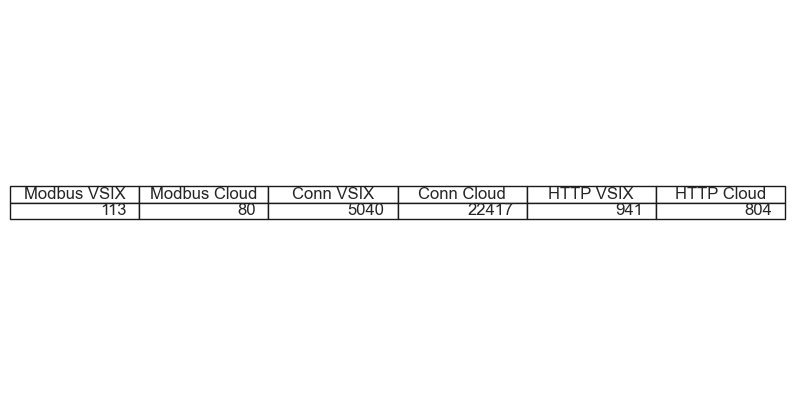

In [115]:
# Create a dataframe from the data
df = pd.DataFrame({
   'Modbus VSIX': [113],
   'Modbus Cloud': [80],
   'Conn VSIX': [5040],
   'Conn Cloud': [22417],
   'HTTP VSIX': [941],
   'HTTP Cloud': [804]
})

# Create a table image
plt.figure(figsize=(10,5))
plt.table(cellText=df.values, colLabels=df.columns, loc='center')
plt.axis('off')
plt.savefig('uniqueip.pdf', bbox_inches='tight')

In [116]:

cloud_get_count = cloud_http_df['method'].value_counts()
vsix_get_count = vsix_http_df['method'].value_counts()

print(cloud_get_count)
print(vsix_get_count)

method
GET        2715
HEAD        376
POST        328
CONNECT     279
PRI          37
OPTIONS      15
t3            4
DELETE        2
HI            2
Name: count, dtype: int64
method
GET        21716
CONNECT     1013
PRI           64
POST          63
OPTIONS       16
HEAD          16
t3             3
PUT            2
HI             2
fox            1
USER           1
Name: count, dtype: int64


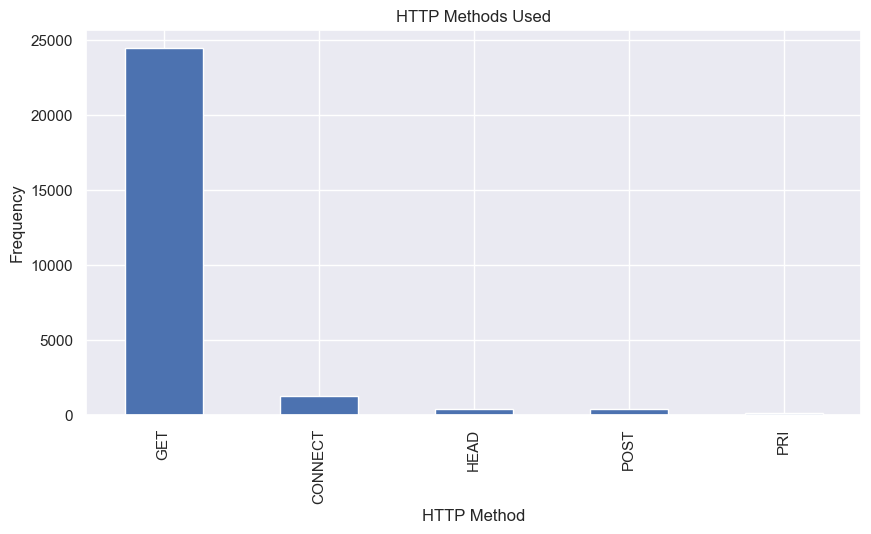

In [117]:
combined_df = pd.concat([cloud_http_df, vsix_http_df]) 
# Create a bar chart of the 'method' column in the cloud_http_df DataFrame
combined_df['method'].value_counts().head(5).plot(kind='bar')

# Add a title and labels to the chart
plt.title('HTTP Methods Used')
plt.xlabel('HTTP Method')
plt.ylabel('Frequency')
plt.savefig('http_methods.pdf')
# Display the chart
plt.show()

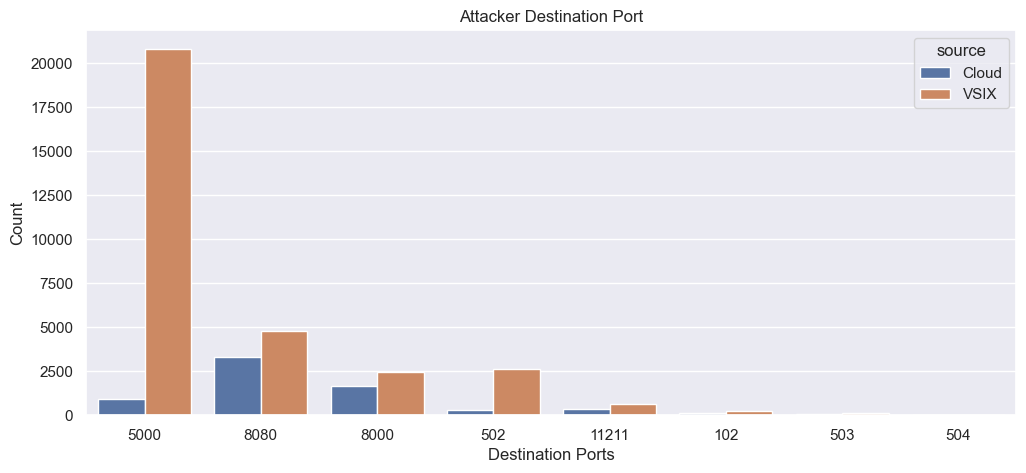

In [118]:
cloud_conn_df =cloud_conn_df.rename(columns={'id.resp_p': 'resp_p',})
vsix_conn_df =vsix_conn_df.rename(columns={'id.resp_p': 'resp_p',})


# Filter the dataframes to include only the specified resp_p values
resp_p_values = [502,503,504,102,11211,5000,8080,8000]
cloud_conn_df = cloud_conn_df[cloud_conn_df['resp_p'].isin(resp_p_values)]
vsix_conn_df = vsix_conn_df[vsix_conn_df['resp_p'].isin(resp_p_values)]


cloud_conn_df['source'] = 'Cloud'
vsix_conn_df['source'] = 'VSIX'
combined_df = pd.concat([cloud_conn_df, vsix_conn_df]) 

plt.figure(figsize=(12,5))

sb.countplot(data=combined_df, x='resp_p', hue='source',
             order=combined_df['resp_p'].value_counts().index, orient='h')
sb.set_style("dark")
plt.title('Attacker Destination Port')
plt.ylabel('Count')
plt.xlabel('Destination Ports');
plt.savefig('dest_ports.pdf')

In [119]:



http_ip_list_cloud = pd.read_csv("./Greynoise/Cloud/gn_analysis_cloud_http.csv")
http_ip_list_vsix = pd.read_csv("./Greynoise/VSIX/gn_analysis_vsix_http.csv")


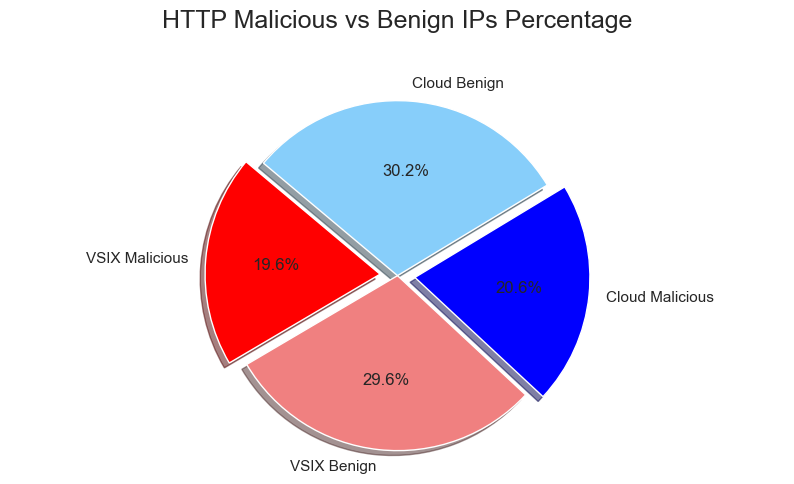

In [120]:
# vsix_df_un = vsix_gn_df.drop_duplicates(subset='ip', keep='first')
# print ("VSIX Malicious IPs percentage: " +str(100*len(vsix_df_un[vsix_df_un["classification"] == "malicious"])/len(vsix_df_un)))
# print ("VSIX Benign IPs percentage: " +str(100*len(vsix_df_un[vsix_df_un["classification"] == "benign"])/len(vsix_df_un)))



# http_ip_list_cloud = http_ip_list_cloud.drop_duplicates(subset='ip', keep='first')
# print ("Cloud Malicious IPs percentage: " +str(100*len(cloud_df_un[cloud_df_un["classification"] == "malicious"])/len(cloud_df_un)))
# print ("Cloud Benign IPs percentage: " +str(100*len(cloud_df_un[cloud_df_un["classification"] == "benign"])/len(cloud_df_un)))


# VSIX Data
http_ip_list_vsix  = http_ip_list_vsix.drop_duplicates(subset='ip', keep='first')
vsix_malicious_percentage = 100 * len(vsix_df_un[vsix_df_un["classification"] == "malicious"]) / len(vsix_df_un)
vsix_benign_percentage = 100 * len(vsix_df_un[vsix_df_un["classification"] == "benign"]) / len(vsix_df_un)

# Cloud Data
http_ip_list_cloud = http_ip_list_cloud.drop_duplicates(subset='ip', keep='first')
cloud_malicious_percentage = 100 * len(cloud_df_un[cloud_df_un["classification"] == "malicious"]) / len(cloud_df_un)
cloud_benign_percentage = 100 * len(cloud_df_un[cloud_df_un["classification"] == "benign"]) / len(cloud_df_un)

# Plotting Pie Chart
labels = ['VSIX Malicious', 'VSIX Benign', 'Cloud Malicious', 'Cloud Benign']
sizes = [vsix_malicious_percentage, vsix_benign_percentage, cloud_malicious_percentage, cloud_benign_percentage]
colors = ['red', 'lightcoral', 'blue', 'lightskyblue']
explode = (0.1, 0, 0.1, 0)  # explode the 1st and 3rd slices

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('HTTP Malicious vs Benign IPs Percentage', size=18,pad=40)
plt.savefig('HTTP_MaliciousvsBenign.pdf',bbox_inches='tight')
plt.show()
